**What's in this notebook?** This notebook validates the additional candidate dS KKLT vacua in the leading order EFT from sections 5.4 and 5.5.

(*Created:* Andreas Schachner, June 18, 2024)

# Imports

In [1]:
import os, gzip, pickle, sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'serif'

sys.path.append("../code/")

from utils import load_zipped_pickle
from validation import verify_complex_structure_stabilisation, verify_SUSY_AdS_minimum, verify_uplifted_minimum

# Loading the data

We load the data as follows

In [2]:
filename = os.getcwd()+ f"/../data/dS_examples/data_extra_dS.p"

df = load_zipped_pickle(filename)

Let us list some of their properties below:

In [3]:
# Pick keys that we want to display below
display_keys = ['paper name','paper section',"h11","h21","gs","W0","gsM","V dS"]

# Show entries of the dataframe for these keys
df[display_keys][:5]

,paper name,paper section,h11,h21,gs,W0,gsM,V dS
0,example a,5.4,93,5,0.040592,0.053450+0.000000j,0.811836,2.382623e-15
1,example b,5.4,93,5,0.040589,0.053456+0.000000j,0.811781,2.409172e-15
2,example c,5.4,93,5,0.040588,0.053458+0.000000j,0.811761,2.418565e-15
3,example d,5.4,93,5,0.040587,0.053459+0.000000j,0.811747,2.425100e-15
4,example e,5.4,93,5,0.040586,0.053463-0.000000j,0.811714,2.439680e-15


The data is described in more detail in a separate notebook [reading_data.ipynb](./reading_data.ipynb). Here we rather focus on validating the results using the scripts collected in the folder `code`.

# 21 additional solutions from section 5.4

Let us pick the additional examples from section 5.4

In [4]:
filename = os.getcwd()+ f"/../data/dS_examples/data_extra_dS.p"

df = load_zipped_pickle(filename)

df_5_4 = df.copy()
df_5_4 = df_5_4[(df_5_4["paper section"]=="5.4")]

# Show entries of the dataframe for these keys
df_5_4[display_keys][:5]

,paper name,paper section,h11,h21,gs,W0,gsM,V dS
0,example a,5.4,93,5,0.040592,0.053450+0.000000j,0.811836,2.382623e-15
1,example b,5.4,93,5,0.040589,0.053456+0.000000j,0.811781,2.409172e-15
2,example c,5.4,93,5,0.040588,0.053458+0.000000j,0.811761,2.418565e-15
3,example d,5.4,93,5,0.040587,0.053459+0.000000j,0.811747,2.425100e-15
4,example e,5.4,93,5,0.040586,0.053463-0.000000j,0.811714,2.439680e-15


Now let us try to verify their dS solutions

## Verifying complex structure moduli stabilisation

Let us test the stabilisation of the complex structure moduli and the axio-dilaton. To this end, we evaluate the F-term conditions induced by the flux superpotential.

----------------------

Example a

Hodge numbers (h11,h21)= (93, 5)
Conifold curve:  [ 0  0  0  1 -1]
Conifold curve in basis (should be (1,0,...,0)):  [1 0 0 0 0]
Check that computed zcf agrees with the saved value:  True

Flux choice...

M-vector:  [ 20   4   8 -18 -20]
K-vector:  [-5 -1  0  1 -1]
p-vector:  [0.         0.02083333 0.04166667 0.02083333 0.        ]

Tests at the PFV level...

PFV condition 1 satisfied (flat direction: N.p=K (eq. (3.15))):  True
PFV condition 2 satisfied (first quantization condition: b.M is integer (eq. (3.17))):  True
PFV condition 3 satisfied (second quantization condition (eq. (3.16)):  True
PFV condition 4 satisfied (Kahler cone condition (eq. (3.14)):  True

Test the F-term conditions...

F-terms:  [1.37835550e-03 5.27310754e-03 6.01198381e-04 9.63606172e-04
 1.85231180e-03 7.32765217e-08]

Compare computed values with saved values...

Value of the flux superpotential W0 agrees with expected value from file:  True
Value of the string coupling gs 

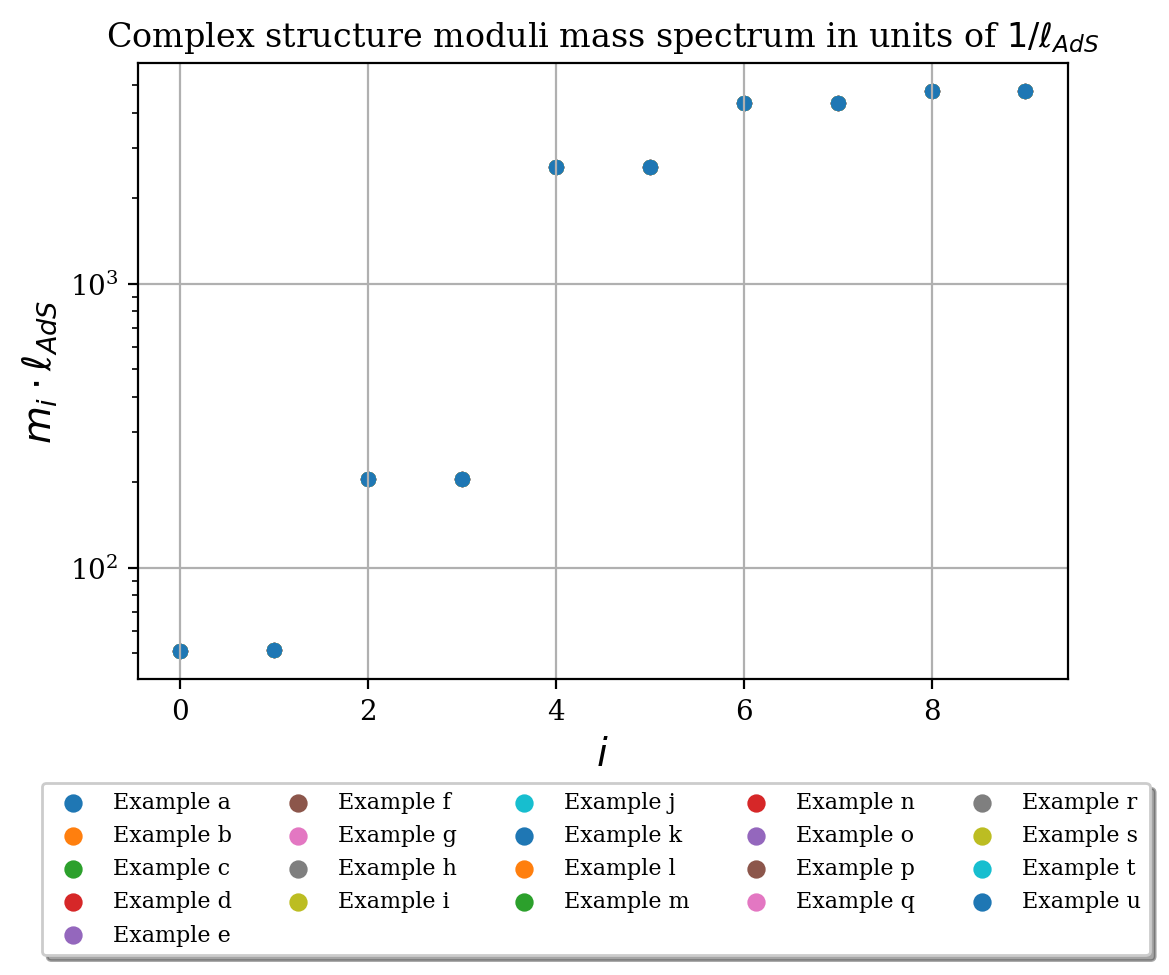

In [5]:
fig = plt.figure(figsize=(6,4),dpi=200)

for i in range(len(df_5_4)):
    
    example = df_5_4.iloc[i]
    
    h21 = example["h21"]
    
    verify_complex_structure_stabilisation(example)
    
    masses = np.array(example["csm mass spectrum in units of 1/lAdS"])
    
    plt.scatter([i for i in range(2*h21)],masses,s=20,label=str(example["paper name"]).capitalize())
    
    
plt.grid()
plt.ylabel('$m_i\cdot \ell_{AdS}$',fontsize=14)
plt.xlabel('$i$',fontsize=14)
plt.yscale('log')
plt.title('Complex structure moduli mass spectrum in units of $1/\ell_{AdS}$',fontsize=12)
plt.legend(title="", markerscale=1.25, bbox_to_anchor=(1.1, -0.15), fancybox=True, shadow=True, ncol=5,fontsize=8)
plt.show()


## Verifying Kähler moduli stabilisation in SUSY AdS precursors

In this section, we check the stabilisation of Kähler moduli in the AdS precursors with worldsheet instanton corrections.

----------------------

Example a

Input values for gs and W0 at the SUSY minimum:
gs = 0.04103331309629634
W0 = 0.052470302166042836

Maximum |dV|:  8.529056566363337e-22
Maximum ratio |dV/V|:  2.7095725938650113e-07

Computed vacuum energy:  -3.1477497911201e-15
Value expected:  -3.1477497911200976e-15
AdS vacuum energy matches expected value:  True

Comparing volumes at the minimum...

Corrected divisor volumes match expected value:  True
Corrected CY volume matches expected value True

Corrected CY volume in Einstein frame:  13094.345944286235

Minimal mass in units of $1/\ell_{AdS}$:  18.433850728843865

----------------------

----------------------

Example b

Input values for gs and W0 at the SUSY minimum:
gs = 0.04103331311120719
W0 = 0.05247030212509057

Maximum |dV|:  1.1767557021177522e-21
Maximum ratio |dV/V|:  3.7384029202685546e-07

Computed vacuum energy:  -3.1477497937360318e-15
Value expected:  -3.147749793736035e-15
AdS vacuum energy matches expected value:  True

Co

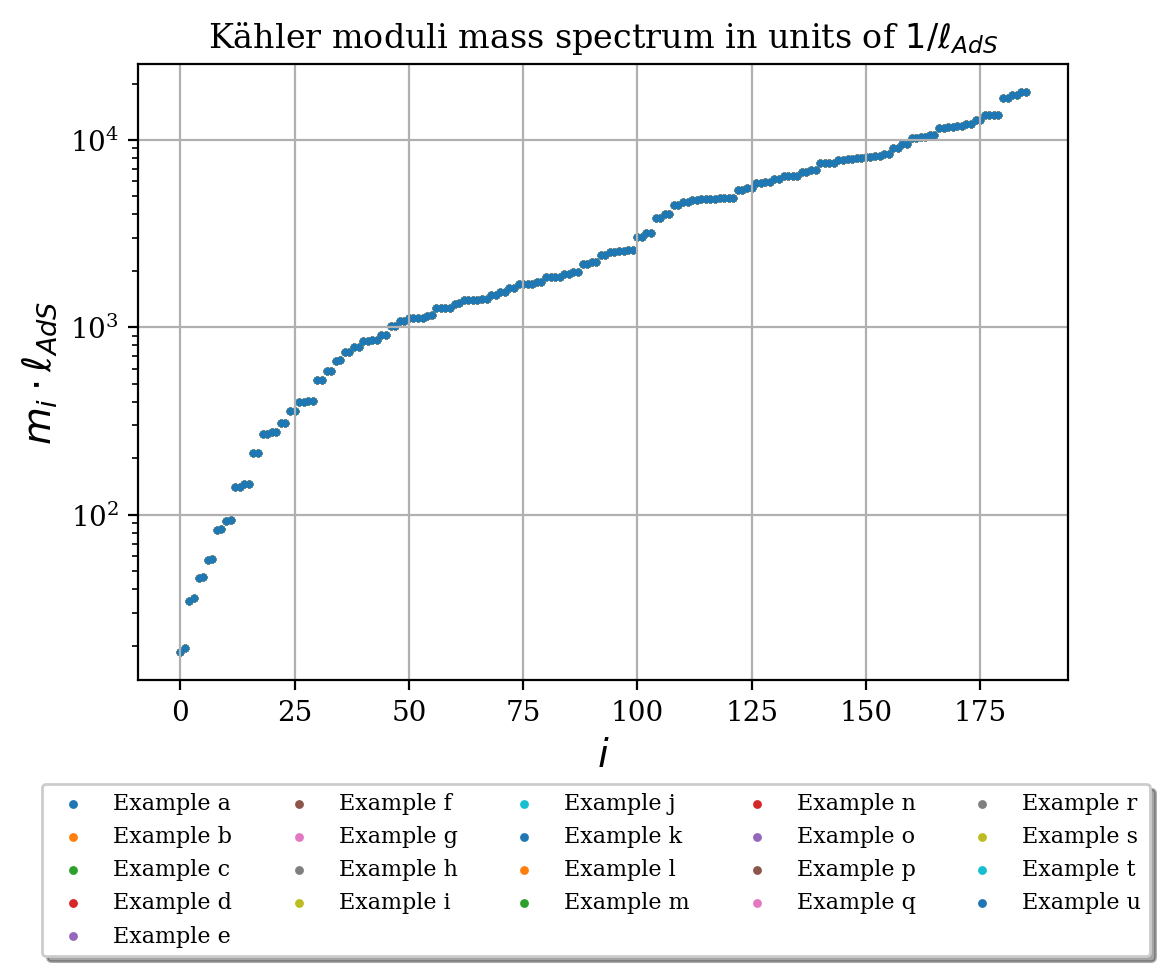

In [6]:
fig = plt.figure(figsize=(6,4),dpi=200)
for i in range(len(df_5_4)):
    
    example = df_5_4.iloc[i].copy()
    
    h11 = example["h11"]
    
    verify_SUSY_AdS_minimum(example)
    
    masses = np.array(example["km mass spectrum in units of 1/lAdS"])
    
    print("")
    
    print("Minimal mass in units of $1/\ell_{AdS}$: ",min(masses))
    
    plt.scatter([i for i in range(2*h11)],masses,s=3,label=str(example["paper name"]).capitalize())
    
    print("")
    print("----------------------")
    print("")
    
plt.grid()
plt.ylabel('$m_i\cdot \ell_{AdS}$',fontsize=14)
plt.xlabel('$i$',fontsize=14)
plt.yscale('log')
plt.title('Kähler moduli mass spectrum in units of $1/\ell_{AdS}$',fontsize=12)
plt.legend(title="", markerscale=1.25, bbox_to_anchor=(1.1, -0.15), fancybox=True, shadow=True, ncol=5,fontsize=8)
plt.show()

## Verifying Kähler moduli stabilisation for dS vacua

Finally, we study the full potential including the uplift contribution from the anti-D3-brane. 

----------------------

Example a

Input values for gs and W0:
gs = 0.040591802573254
W0 = 0.05345047416195766

Maximum |dV|:  2.1804512782344194e-23
Maximum ratio |dV/V|:  9.151475828884224e-09

Computed vacuum energy:  2.3826225616554644e-15
Value expected:  2.3826225616554487e-15
dS vacuum energy matches expected value:  True

Comparing volumes at the minimum...

Corrected divisor volumes match expected value:  True
Corrected CY volume matches expected value True

Corrected CY volume in Einstein frame:  7298.805721464625

Minimal mass in Hubble units:  37.074232118812034

----------------------

----------------------

Example b

Input values for gs and W0:
gs = 0.04058907069122918
W0 = 0.05345594716881014

Maximum |dV|:  9.133217650781612e-24
Maximum ratio |dV/V|:  3.791018965030531e-09

Computed vacuum energy:  2.4091722397141997e-15
Value expected:  2.4091722397141934e-15
dS vacuum energy matches expected value:  True

Comparing volumes at the minimum...

Corrected divisor volume

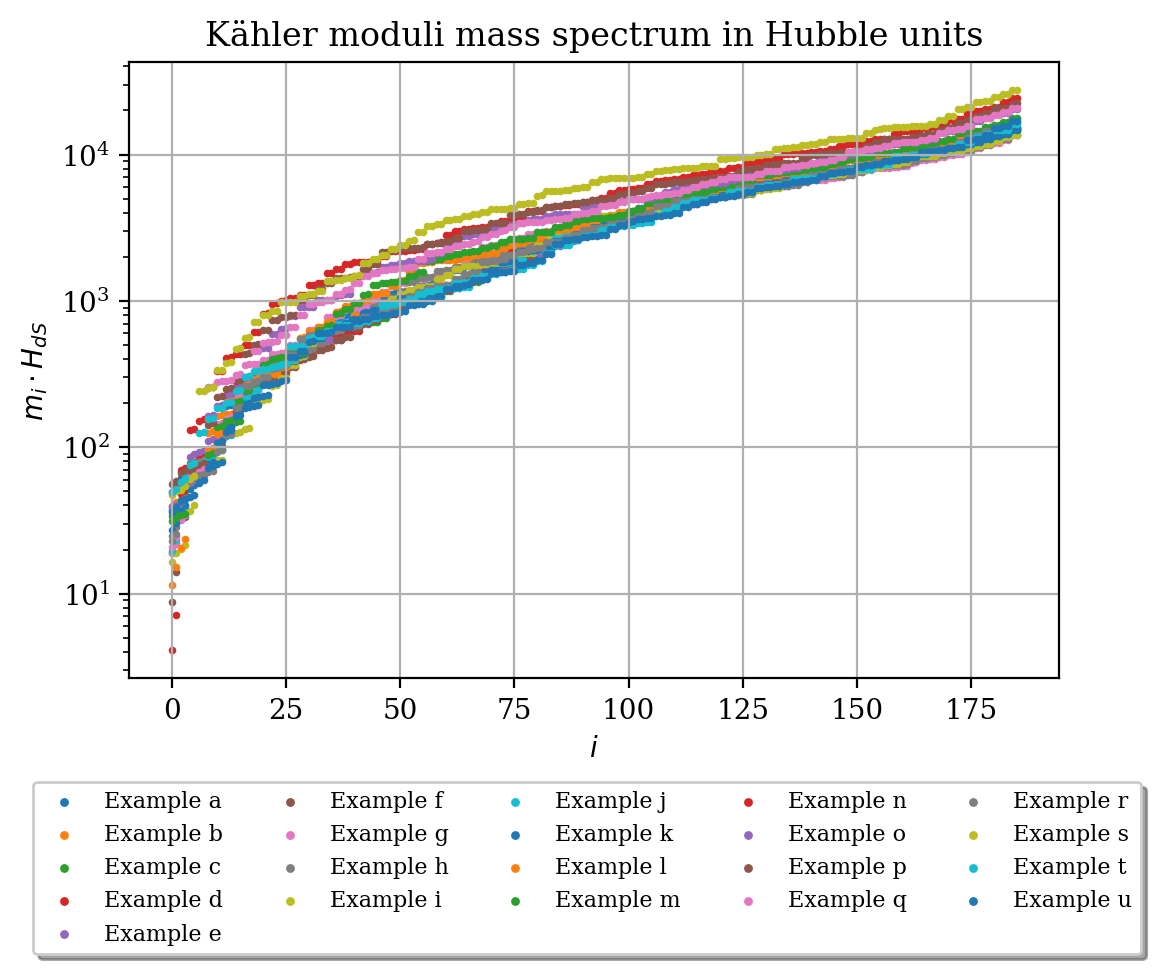

In [7]:
fig = plt.figure(figsize=(6,4),dpi=200)
for i in range(len(df_5_4)):
    example = df_5_4.iloc[i].copy()
    
   
    verify_uplifted_minimum(example,vacuum_type="dS")
    
    h11 = example["h11"]
    
    masses = np.array(example["km mass spectrum in Hubble units"])
    
    print("")
    
    print("Minimal mass in Hubble units: ",min(masses))
    
    
    plt.scatter([i for i in range(2*h11)],masses,s=3,label=str(example["paper name"]).capitalize())
    
    print("")
    print("----------------------")
    print("")
    
plt.ylabel('$m_i\cdot H_{dS}$')
plt.xlabel('$i$')
plt.yscale('log')
plt.title('Kähler moduli mass spectrum in Hubble units',fontsize=12)
plt.grid()
plt.legend(title="", markerscale=1.25, bbox_to_anchor=(1.1, -0.15), fancybox=True, shadow=True, ncol=5,fontsize=8)
plt.show()

# Four additional solutions from section 5.5

Let us pick the additional examples from section 5.5:

In [8]:
filename = os.getcwd()+ f"/../data/dS_examples/data_extra_dS.p"

df = load_zipped_pickle(filename)

df_5_5 = df.copy()
df_5_5 = df_5_5[(df_5_5["paper section"]=="5.5")]

# Show entries of the dataframe for these keys
df_5_5[display_keys][:5]

,paper name,paper section,h11,h21,gs,W0,gsM,V dS
21,example a,5.5,93,5,0.046851,-0.030319+0.000000j,0.749619,2.652089e-15
22,example b,5.5,93,5,0.046838,-0.030324-0.000000j,0.749410,2.617187e-15
23,example c,5.5,93,5,0.046740,-0.030354-0.000000j,0.747835,2.394773e-15
24,example d,5.5,93,5,0.046704,-0.030365-0.000000j,0.747257,2.319912e-15


Now let us try to verify their dS solutions

## Verifying complex structure moduli stabilisation

Let us test the stabilisation of the complex structure moduli and the axio-dilaton. To this end, we evaluate the F-term conditions induced by the flux superpotential.

----------------------

Example a

Hodge numbers (h11,h21)= (93, 5)
Conifold curve:  [0 1 0 0 0]
Conifold curve in basis (should be (1,0,...,0)):  [1 0 0 0 0]
Check that computed zcf agrees with the saved value:  True

Flux choice...

M-vector:  [ 16  12 -10 -30 -14]
K-vector:  [-4  4  1  3 -1]
p-vector:  [0.    0.025 0.025 0.    0.125]

Tests at the PFV level...

PFV condition 1 satisfied (flat direction: N.p=K (eq. (3.15))):  True
PFV condition 2 satisfied (first quantization condition: b.M is integer (eq. (3.17))):  True
PFV condition 3 satisfied (second quantization condition (eq. (3.16)):  True
PFV condition 4 satisfied (Kahler cone condition (eq. (3.14)):  True

Test the F-term conditions...

F-terms:  [5.11334673e-05 1.05592493e-03 1.40331074e-04 3.50162234e-04
 8.99260889e-05 8.54386259e-08]

Compare computed values with saved values...

Value of the flux superpotential W0 agrees with expected value from file:  True
Value of the string coupling gs agrees with expected value fro

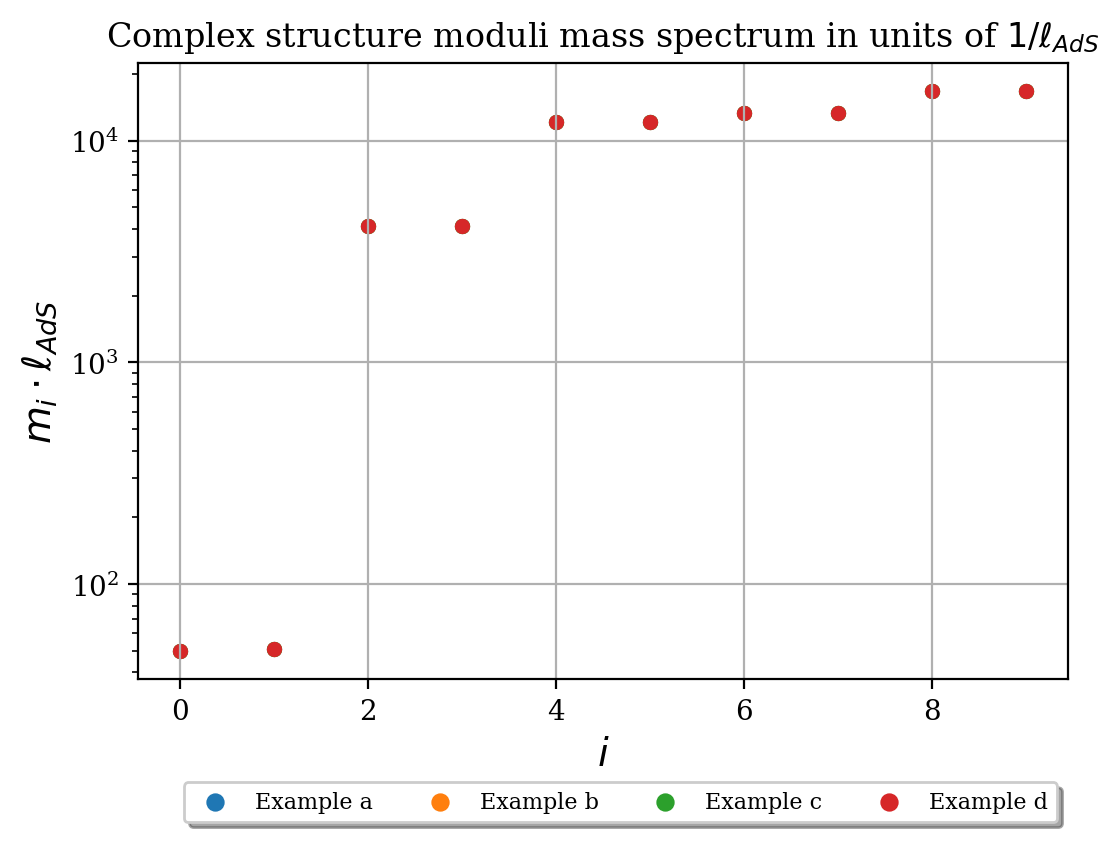

In [9]:
fig = plt.figure(figsize=(6,4),dpi=200)

for i in range(len(df_5_5)):
    
    example = df_5_5.iloc[i]
    
    h21 = example["h21"]
    
    verify_complex_structure_stabilisation(example)
    
    masses = np.array(example["csm mass spectrum in units of 1/lAdS"])
    
    plt.scatter([i for i in range(2*h21)],masses,s=20,label=str(example["paper name"]).capitalize())
    
    
plt.grid()
plt.ylabel('$m_i\cdot \ell_{AdS}$',fontsize=14)
plt.xlabel('$i$',fontsize=14)
plt.yscale('log')
plt.title('Complex structure moduli mass spectrum in units of $1/\ell_{AdS}$',fontsize=12)
plt.legend(title="", markerscale=1.25, bbox_to_anchor=(1., -0.15), fancybox=True, shadow=True, ncol=5,fontsize=8)
plt.show()


## Verifying Kähler moduli stabilisation in SUSY AdS precursors

In this section, we check the stabilisation of Kähler moduli in the AdS precursors with worldsheet instanton corrections.

----------------------

Example a

Input values for gs and W0 at the SUSY minimum:
gs = 0.048604169946065395
W0 = 0.029069123936136032

Maximum |dV|:  1.9465045886841535e-22
Maximum ratio |dV/V|:  1.4321609101436768e-07

Computed vacuum energy:  -1.3591381910353054e-15
Value expected:  -1.3591381910353071e-15
AdS vacuum energy matches expected value:  True

Comparing volumes at the minimum...

Corrected divisor volumes match expected value:  True
Corrected CY volume matches expected value True

Corrected CY volume in Einstein frame:  7804.739468635203

Minimal mass in units of $1/\ell_{AdS}$:  27.355226506329508

----------------------

----------------------

Example b

Input values for gs and W0 at the SUSY minimum:
gs = 0.048604169946065395
W0 = 0.029069123936136032

Maximum |dV|:  1.9465045886841535e-22
Maximum ratio |dV/V|:  1.4321609101436768e-07

Computed vacuum energy:  -1.3591381910353054e-15
Value expected:  -1.3591381910353071e-15
AdS vacuum energy matches expected value:  T

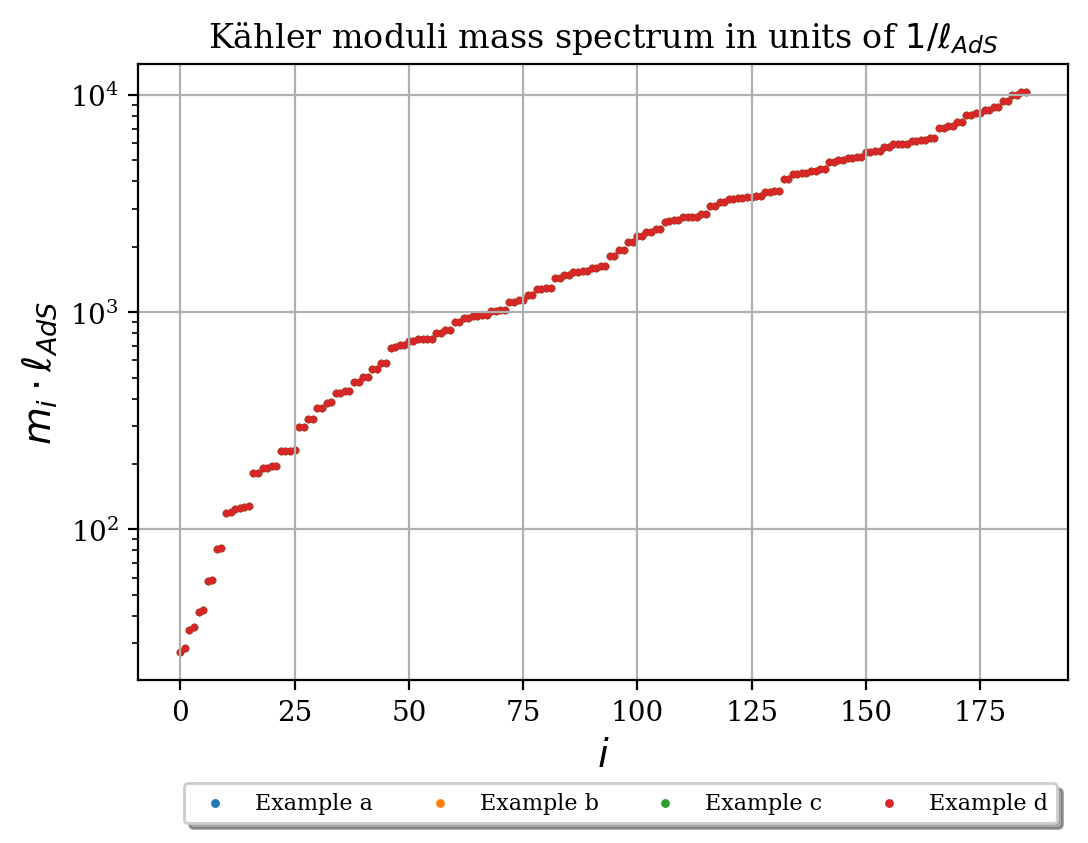

In [10]:
fig = plt.figure(figsize=(6,4),dpi=200)
for i in range(len(df_5_5)):
    example = df_5_5.iloc[i].copy()
    
    h11 = example["h11"]
    
    verify_SUSY_AdS_minimum(example)
    
    masses = np.array(example["km mass spectrum in units of 1/lAdS"])
    
    print("")
    
    print("Minimal mass in units of $1/\ell_{AdS}$: ",min(masses))
    
    plt.scatter([i for i in range(2*h11)],masses,s=3,label=str(example["paper name"]).capitalize())
    
    print("")
    print("----------------------")
    print("")
    
plt.grid()
plt.ylabel('$m_i\cdot \ell_{AdS}$',fontsize=14)
plt.xlabel('$i$',fontsize=14)
plt.yscale('log')
plt.title('Kähler moduli mass spectrum in units of $1/\ell_{AdS}$',fontsize=12)
plt.legend(title="", markerscale=1.25, bbox_to_anchor=(1., -0.15), fancybox=True, shadow=True, ncol=5,fontsize=8)
plt.show()

## Verifying Kähler moduli stabilisation for dS vacua

Finally, we study the full potential including the uplift contribution from the anti-D3-brane. 

----------------------

Example a

Input values for gs and W0:
gs = 0.046851188973247374
W0 = 0.03031911288110112

Maximum |dV|:  4.1635742580591547e-23
Maximum ratio |dV/V|:  1.5699223874979306e-08

Computed vacuum energy:  2.6520892314268263e-15
Value expected:  2.6520892314268263e-15
dS vacuum energy matches expected value:  True

Comparing volumes at the minimum...

Corrected divisor volumes match expected value:  True
Corrected CY volume matches expected value True

Corrected CY volume in Einstein frame:  6883.651676379887

Minimal mass in Hubble units:  24.63817398010314

----------------------

----------------------

Example b

Input values for gs and W0:
gs = 0.04683810052482555
W0 = 0.030323512648484183

Maximum |dV|:  1.5189823591069142e-23
Maximum ratio |dV/V|:  5.803874344642479e-09

Computed vacuum energy:  2.6171868460747733e-15
Value expected:  2.617186846074777e-15
dS vacuum energy matches expected value:  True

Comparing volumes at the minimum...

Corrected divisor vo

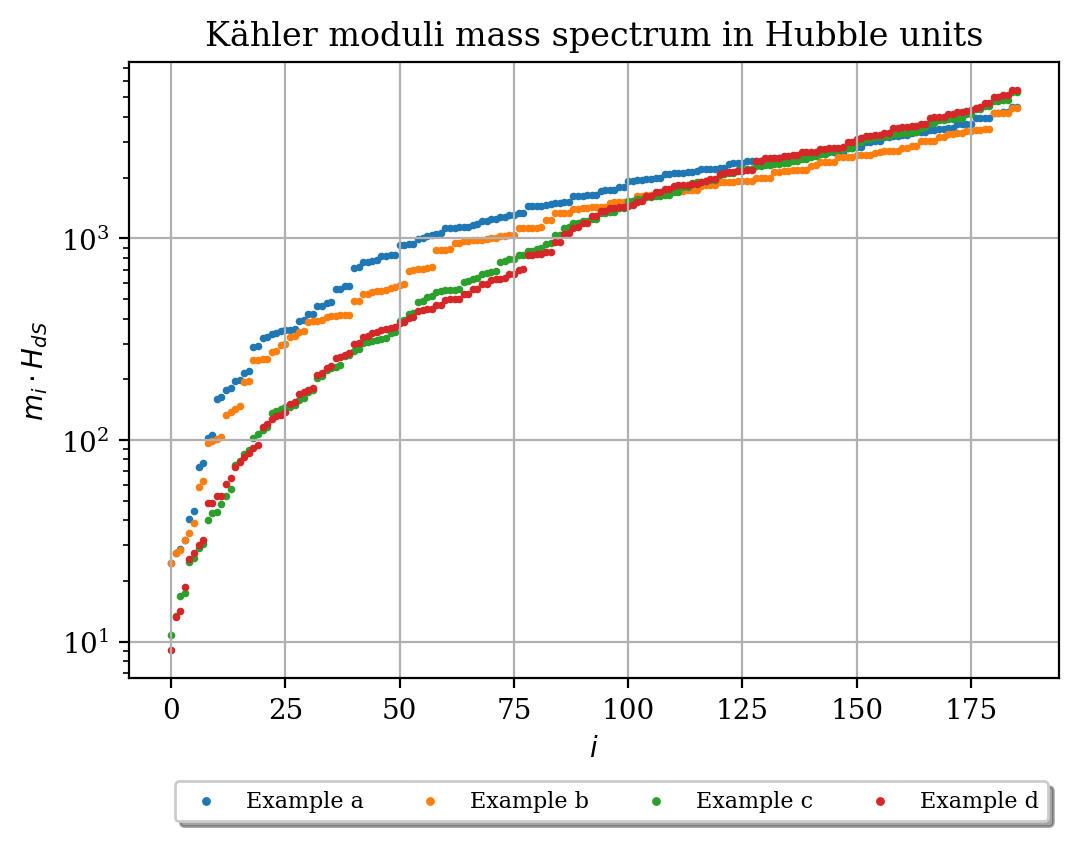

In [11]:
fig = plt.figure(figsize=(6,4),dpi=200)
for i in range(len(df_5_5)):
    example = df_5_5.iloc[i].copy()
    
   
    verify_uplifted_minimum(example,vacuum_type="dS")
    
    h11 = example["h11"]
    
    masses = np.array(example["km mass spectrum in Hubble units"])
    
    print("")
    
    print("Minimal mass in Hubble units: ",min(masses))
    
    
    plt.scatter([i for i in range(2*h11)],masses,s=3,label=str(example["paper name"]).capitalize())
    
    print("")
    print("----------------------")
    print("")
    
plt.ylabel('$m_i\cdot H_{dS}$')
plt.xlabel('$i$')
plt.yscale('log')
plt.title('Kähler moduli mass spectrum in Hubble units',fontsize=12)
plt.grid()
plt.legend(title="", markerscale=1.25, bbox_to_anchor=(1., -0.15), fancybox=True, shadow=True, ncol=5,fontsize=8)
plt.show()